In [1]:
setwd('/lustre/scratch117/cellgen/team297/kt16/COVID_imperial_renal/')
dfx <- read.csv('h5ad/vdj_obs.csv')
dfx$case_control <- factor(dfx$case_control, levels = c('NEGATIVE', 'POSITIVE', 'RECOVERY'))
dfx$WHO_temp_severity <- factor(dfx$WHO_temp_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'))
dfx$WHO_temp_severity_group <- factor(dfx$WHO_temp_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'), labels = c('NA', 'mild_moderate', 'mild_moderate', 'severe_critical', 'severe_critical'))
dfx$WHO_severity_group <- factor(dfx$WHO_severity, levels = c('NA', 'mild', 'moderate', 'severe', 'critical'), labels = c('NA', 'mild_moderate', 'mild_moderate', 'severe_critical', 'severe_critical')) # interpreted as peak severity
dfx$grouped_temp_severity <- ifelse(dfx$WHO_temp_severity %in% c("mild", "moderate"), "mild_moderate", "severe_critical")
dfx$grouped_severity <- ifelse(dfx$WHO_severity %in% c("mild", "moderate"), "mild_moderate", "severe_critical")
dfx$age_scaled <- scale(dfx$calc_age) # scale age
dfx

X,orig.ident,nCount_RNA,nFeature_RNA,nCount_ADT,nFeature_ADT,nCount_ADT_raw,nFeature_ADT_raw,nCount_RNA_raw,nFeature_RNA_raw,⋯,Interferon_group,celltype_B_corrected_IFN,time_from_first_symptoms,time_from_positive_swab,time_from_infection,WHO_temp_severity_group,WHO_severity_group,grouped_temp_severity,grouped_severity,age_scaled
<chr>,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,⋯,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<chr>,<chr>,"<dbl[,1]>"
UK-CIC10689738+UK-CIC10690026_AACACGTGTTGGTGGA-1,UK-CIC10689738+UK-CIC10690026,24533.947,4446,1510.8372,42,3067,129,24769,4448,⋯,Low,B_ASC_dividing_Low,18,15,18,mild_moderate,severe_critical,mild_moderate,severe_critical,0.2842453
UK-CIC10689738+UK-CIC10690026_AACCATGCAGTCACTA-1,UK-CIC10689738+UK-CIC10690026,4272.421,1645,2474.1875,45,4626,135,4328,1645,⋯,Low,B_switched_mem_Low,0,0,0,NA,NA,severe_critical,severe_critical,0.2842453
UK-CIC10689738+UK-CIC10690026_AACCGCGAGTCTCCTC-1,UK-CIC10689738+UK-CIC10690026,3397.527,1465,1758.1501,46,3295,132,3436,1465,⋯,Low,B_switched_mem_Low,0,0,0,NA,NA,severe_critical,severe_critical,0.2842453
UK-CIC10689738+UK-CIC10690026_AACCGCGGTCCAACTA-1,UK-CIC10689738+UK-CIC10690026,23251.436,3923,1636.1969,35,3092,131,23593,3926,⋯,Low,B_ASC_dividing_Low,0,0,0,NA,NA,severe_critical,severe_critical,0.2842453
UK-CIC10689738+UK-CIC10690026_AACGTTGCATCCCATC-1,UK-CIC10689738+UK-CIC10690026,3437.076,1414,753.6671,52,1437,125,3474,1414,⋯,Low,B_switched_mem_Low,0,0,0,NA,NA,severe_critical,severe_critical,0.2842453
UK-CIC10689738+UK-CIC10690026_AACGTTGTCCTAGGGC-1,UK-CIC10689738+UK-CIC10690026,3130.995,1338,1142.2063,60,2426,133,3165,1339,⋯,Low,B_switched_mem_Low,0,0,0,NA,NA,severe_critical,severe_critical,0.2842453
UK-CIC10689738+UK-CIC10690026_AACGTTGTCTAACCGA-1,UK-CIC10689738+UK-CIC10690026,2734.290,1179,1275.0891,59,2715,132,2764,1180,⋯,Low,B_naive_Low,0,0,0,NA,NA,severe_critical,severe_critical,0.2842453
UK-CIC10689738+UK-CIC10690026_AACTCAGCACACCGAC-1,UK-CIC10689738+UK-CIC10690026,2904.968,1090,1468.8101,64,3336,133,2932,1090,⋯,Low,B_naive_Low,0,0,0,NA,NA,severe_critical,severe_critical,0.2842453
UK-CIC10689738+UK-CIC10690026_AACTCTTAGAAACGAG-1,UK-CIC10689738+UK-CIC10690026,3481.484,1236,1792.3641,62,3697,136,3515,1236,⋯,Low,B_switched_mem_Low,0,0,0,NA,NA,severe_critical,severe_critical,0.2842453


In [2]:
length(unique(dfx$sample_id))

[1] 187

In [3]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
dfx = distinct(dfx, sample_id, .keep_all = TRUE)
row.names(dfx) <- dfx$sample_id
dfx

,X,orig.ident,nCount_RNA,nFeature_RNA,nCount_ADT,nFeature_ADT,nCount_ADT_raw,nFeature_ADT_raw,nCount_RNA_raw,nFeature_RNA_raw,⋯,Interferon_group,celltype_B_corrected_IFN,time_from_first_symptoms,time_from_positive_swab,time_from_infection,WHO_temp_severity_group,WHO_severity_group,grouped_temp_severity,grouped_severity,age_scaled
,<chr>,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,⋯,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<chr>,<chr>,"<dbl[,1]>"
C123_0505,UK-CIC10689738+UK-CIC10690026_AACACGTGTTGGTGGA-1,UK-CIC10689738+UK-CIC10690026,24533.947,4446,1510.8372,42,3067,129,24769,4448,⋯,Low,B_ASC_dividing_Low,18,15,18,mild_moderate,severe_critical,mild_moderate,severe_critical,0.28424531
C103_2204,UK-CIC10689738+UK-CIC10690026_AACCATGCAGTCACTA-1,UK-CIC10689738+UK-CIC10690026,4272.421,1645,2474.1875,45,4626,135,4328,1645,⋯,Low,B_switched_mem_Low,0,0,0,NA,NA,severe_critical,severe_critical,0.28424531
C214_2705,UK-CIC10689740+UK-CIC10690028_AAACCTGAGACCCACC-1,UK-CIC10689740+UK-CIC10690028,5455.078,1526,3334.2003,81,5549,137,5505,1526,⋯,Low,B_non-switched_mem_Low,0,0,0,NA,NA,severe_critical,severe_critical,0.39674179
C42_1504,UK-CIC10689740+UK-CIC10690028_AAACGGGCATGGAATA-1,UK-CIC10689740+UK-CIC10690028,4313.832,1441,2932.7818,87,5107,136,4352,1442,⋯,High,B_non-switched_mem_High,2,0,2,mild_moderate,mild_moderate,mild_moderate,mild_moderate,-1.17820892
C40_0105,UK-CIC10689740+UK-CIC10690028_AAAGCAATCAACACAC-1,UK-CIC10689740+UK-CIC10690028,59006.991,6043,4218.8596,53,6592,136,59627,6051,⋯,Low,B_ASC_dividing_Low,18,18,18,severe_critical,severe_critical,severe_critical,severe_critical,-0.22198885
C124_0105,UK-CIC10689742+UK-CIC10690030_AAACCTGGTCAAAGCG-1,UK-CIC10689742+UK-CIC10690030,23794.974,3521,6338.4110,125,6928,135,24050,3523,⋯,Low,B_ASC_IgA_Low,16,11,16,mild_moderate,mild_moderate,mild_moderate,mild_moderate,1.12796891
C104_2204,UK-CIC10689742+UK-CIC10690030_AAAGTAGAGTGCTGCC-1,UK-CIC10689742+UK-CIC10690030,3080.648,1218,2221.0512,131,2436,134,3105,1218,⋯,Low,B_naive_Low,0,0,0,NA,NA,severe_critical,severe_critical,1.12796891
C123_2404,UK-CIC10689742+UK-CIC10690030_AAAGTAGTCCCACTTG-1,UK-CIC10689742+UK-CIC10690030,4098.700,1532,4179.1155,123,4561,132,4134,1532,⋯,Low,B_switched_mem_Low,7,4,7,severe_critical,severe_critical,severe_critical,severe_critical,0.28424531
C123_2904,UK-CIC10689744+UK-CIC10690032_AAACCTGCAGGACGTA-1,UK-CIC10689744+UK-CIC10690032,4746.080,1661,4610.4042,42,7397,135,4793,1661,⋯,Low,B_naive_Low,12,9,12,severe_critical,severe_critical,severe_critical,severe_critical,0.28424531


In [59]:
gini <- read.csv('h5ddl/network_gini.csv', row.names = 1)
dim(gini)

[1] 187   4

In [60]:
data = cbind(dfx, gini[row.names(dfx),])
dim(data)

[1] 187 231

In [61]:
# enforce at least 10 cells and remove non-positives
data <- data[data$case_control == 'POSITIVE', ]
data <- data[data$cell_counts >= 10, ]
dim(data)

[1] 136 231

In [63]:
fullFormula = as.formula("gini ~ splines::bs(time_from_infection, degree = 2) * grouped_severity + sex + ethnicity + age_scaled + centre + (1|individual_id)")
fullFormula

gini ~ splines::bs(time_from_infection, degree = 2) * grouped_severity + 
    sex + ethnicity + age_scaled + centre + (1 | individual_id)

In [64]:
library(lmerTest)

In [65]:
fits <- lapply(c('clone_network_cluster_size_gini','clone_network_vertex_size_gini'), function(x){
    data$gini <- data[,x]
    fit <- lmerTest::lmer(fullFormula, data = data)
    return(list(fit=fit, data=data))
})

In [66]:
fit_res <- lapply(fits, function(x) anova(x$fit))
singular <- lapply(fits, function(x) as.numeric(isSingular(x$fit)))
conv <- lapply(fits, function(x) length(slot(x$fit, "optinfo")$conv$lme4$messages))
pvals <- lapply(fit_res, function(x) x[7,6])
qvals <- p.adjust(pvals, method = 'BH')
df = data.frame(pvals = unlist(pvals), 
                qvals = unlist(qvals), 
                singular = unlist(singular), 
                conv = unlist(conv), 
                row.names = c('cluster_size_gini', 'vertex_size_gini'))
# df = df[df$qval < 0.05 & df$singular == 0 & df$conv == 0,]
df

,pvals,qvals,singular,conv
,<dbl>,<dbl>,<dbl>,<int>
cluster_size_gini,0.3138969,0.31389687,0,0
vertex_size_gini,0.0194325,0.03886501,0,0


In [67]:
library(emmeans)
library(ggplot2)
library(ggpubr)

Warning message in grid.Call.graphics(C_polygon, x$x, x$y, index):
“semi-transparency is not supported on this device: reported only once per page”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”


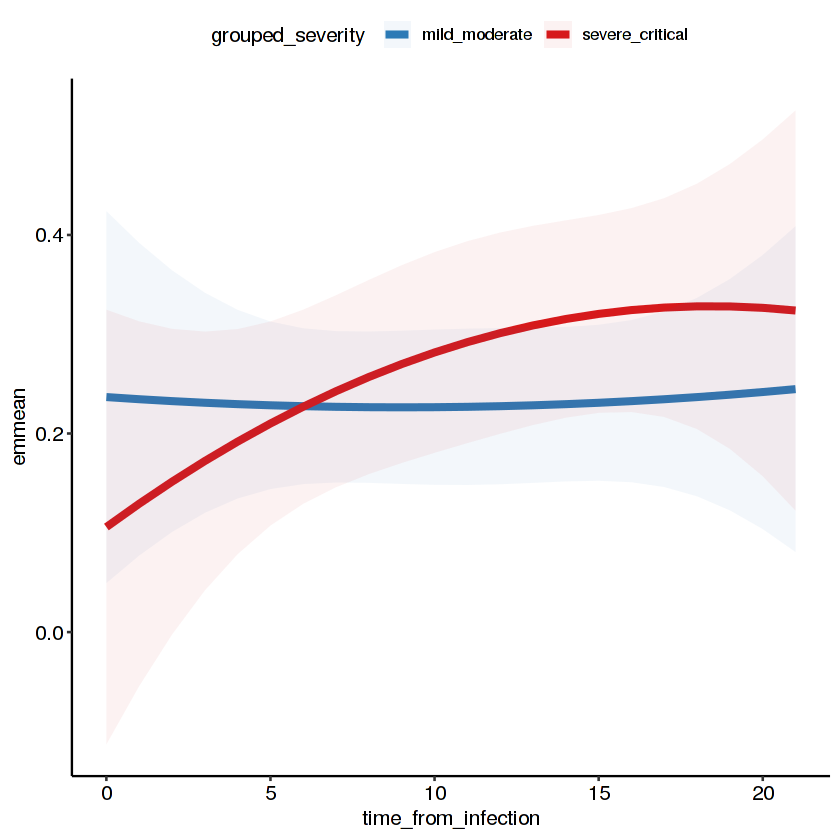

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”


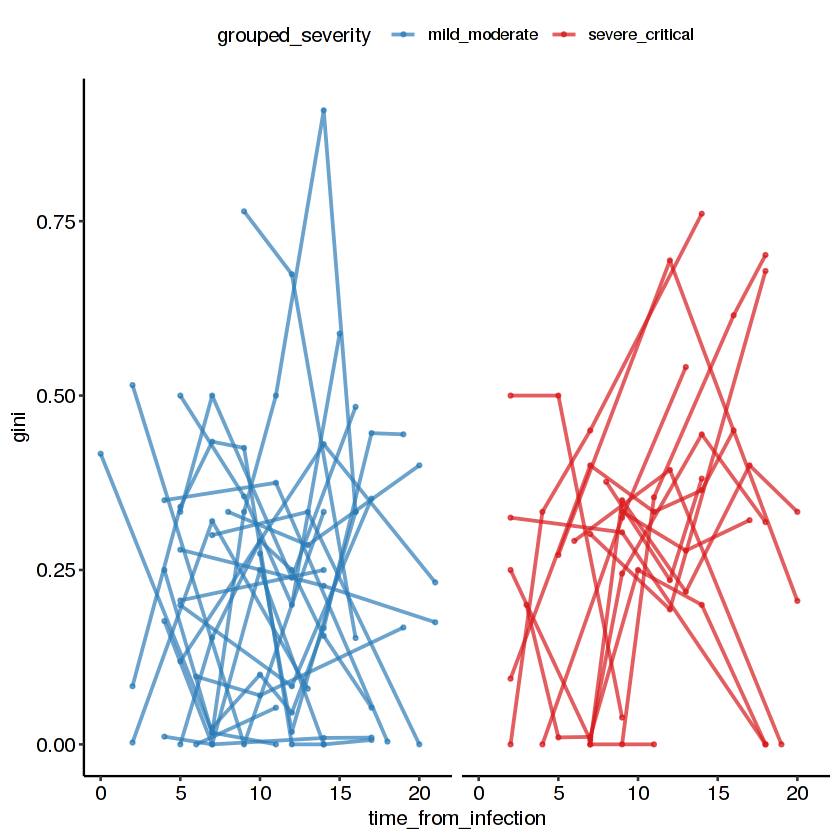

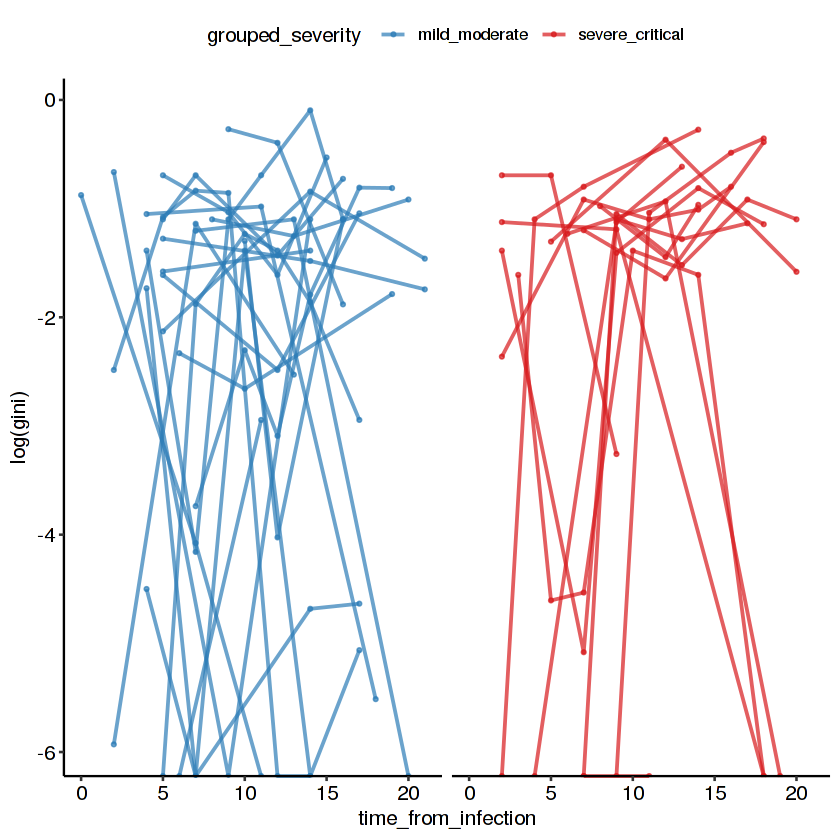

In [68]:
i = 1
x = emmeans(fits[[i]]$fit, ~ time_from_infection | grouped_severity, at = list(time_from_infection = 0:21))
theme_set(theme_pubr())

ggplot(data.frame(x), aes(time_from_infection, emmean, group = grouped_severity, fill = grouped_severity)) +
    geom_line(aes(colour = grouped_severity), size = 1.7) +
    geom_ribbon(aes(ymin = lower.CL, ymax = upper.CL), alpha = 0.055) +
    scale_color_manual(values = c("#2C7BB6", "#D7191C")) +
    scale_fill_manual(values = c("#2C7BB6", "#D7191C"))

ggplot(fits[[i]]$data, aes(time_from_infection, gini, col = grouped_severity)) +
    geom_point(alpha = 0.7, size = 0.7) +
    geom_line(aes(group = individual_id), alpha = 0.7, size = 0.8) +
    scale_color_manual(values = c("#2C7BB6", "#D7191C")) +
    facet_wrap(~grouped_severity) +
    theme(strip.background = element_blank(), strip.text.x = element_blank(), strip.text.y = element_blank())

ggplot(fits[[i]]$data, aes(time_from_infection, log(gini), col = grouped_severity)) +
    geom_point(alpha = 0.7, size = 0.7) +
    geom_line(aes(group = individual_id), alpha = 0.7, size = 0.8) +
    scale_color_manual(values = c("#2C7BB6", "#D7191C")) +
    facet_wrap(~grouped_severity) +
    theme(strip.background = element_blank(), strip.text.x = element_blank(), strip.text.y = element_blank())

Warning message in grid.Call.graphics(C_polygon, x$x, x$y, index):
“semi-transparency is not supported on this device: reported only once per page”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”


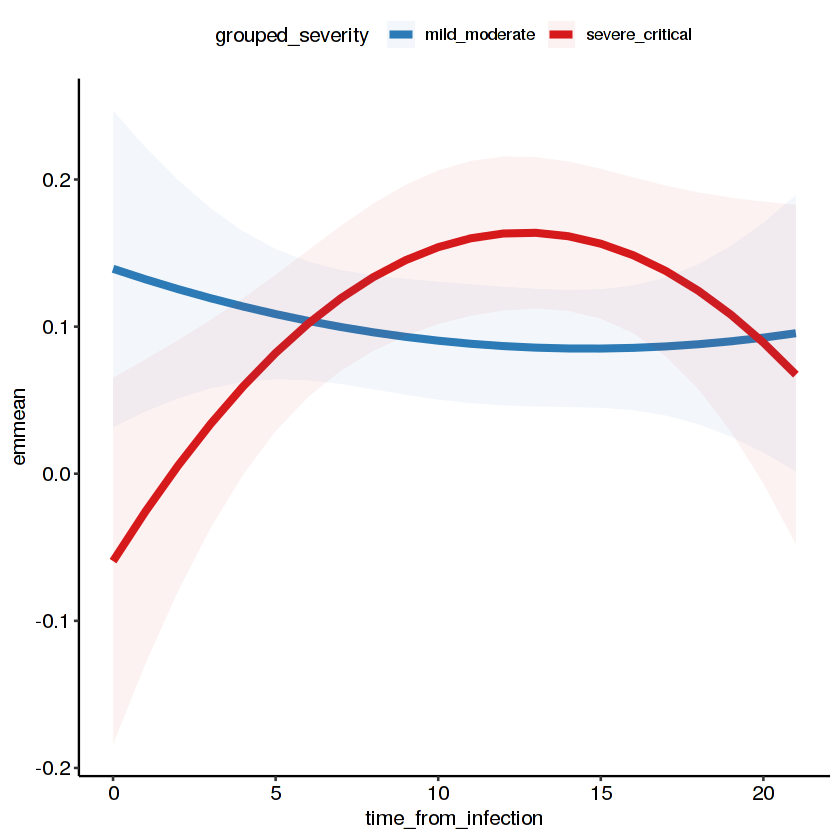

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”


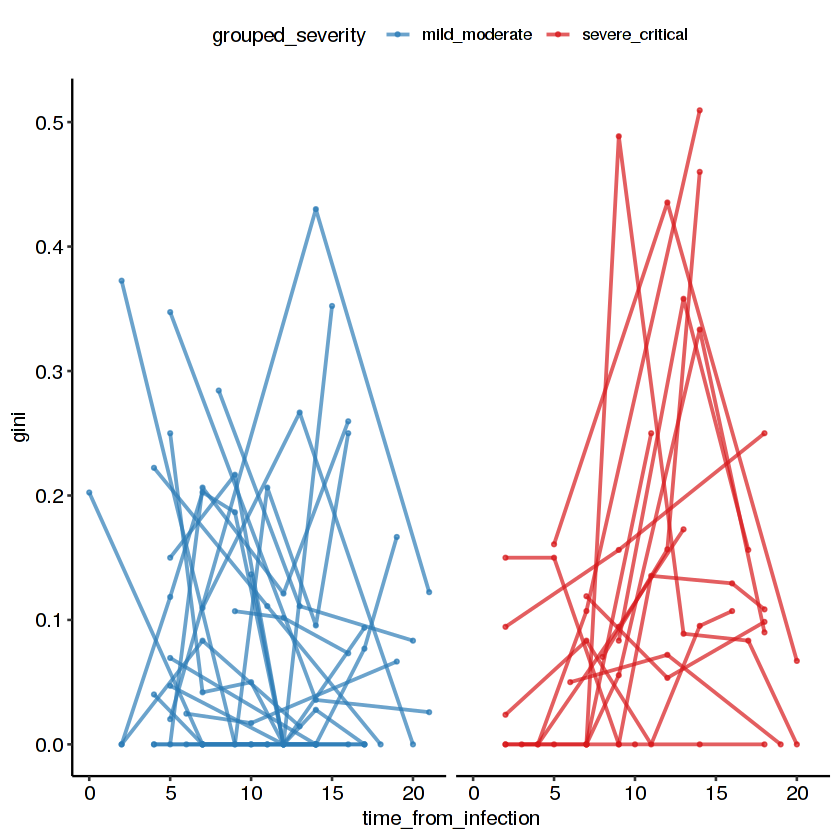

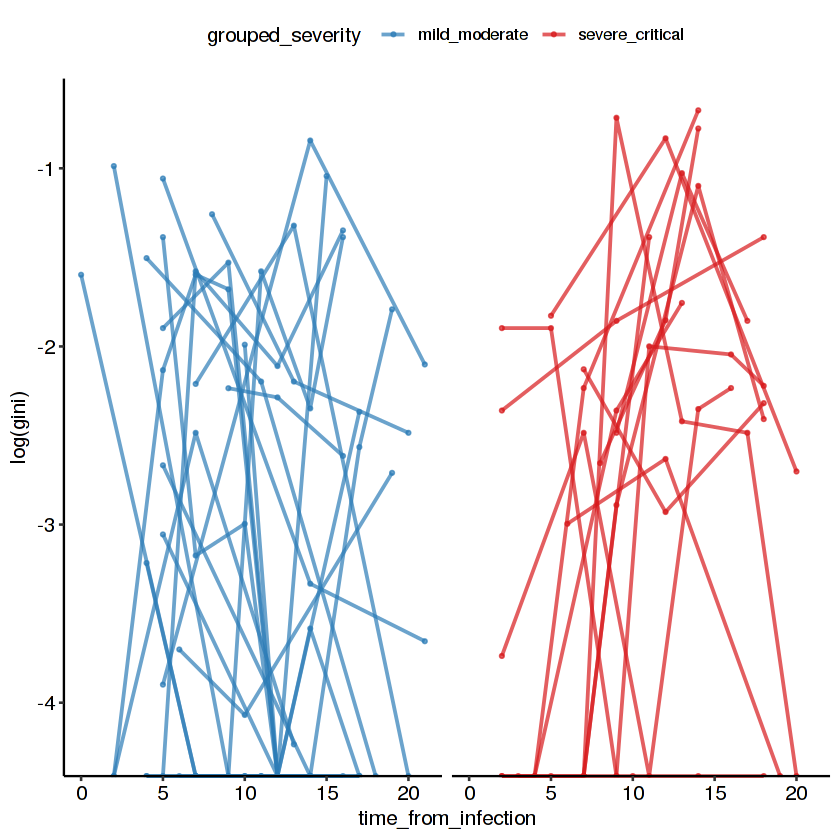

In [69]:
i = 2
x = emmeans(fits[[i]]$fit, ~ time_from_infection | grouped_severity, at = list(time_from_infection = 0:21))
theme_set(theme_pubr())

ggplot(data.frame(x), aes(time_from_infection, emmean, group = grouped_severity, fill = grouped_severity)) +
    geom_line(aes(colour = grouped_severity), size = 1.7) +
    geom_ribbon(aes(ymin = lower.CL, ymax = upper.CL), alpha = 0.055) +
    scale_color_manual(values = c("#2C7BB6", "#D7191C")) +
    scale_fill_manual(values = c("#2C7BB6", "#D7191C"))

ggplot(fits[[i]]$data, aes(time_from_infection, gini, col = grouped_severity)) +
    geom_point(alpha = 0.7, size = 0.7) +
    geom_line(aes(group = individual_id), alpha = 0.7, size = 0.8) +
    scale_color_manual(values = c("#2C7BB6", "#D7191C")) +
    facet_wrap(~grouped_severity) +
    theme(strip.background = element_blank(), strip.text.x = element_blank(), strip.text.y = element_blank())

ggplot(fits[[i]]$data, aes(time_from_infection, log(gini), col = grouped_severity)) +
    geom_point(alpha = 0.7, size = 0.7) +
    geom_line(aes(group = individual_id), alpha = 0.7, size = 0.8) +
    scale_color_manual(values = c("#2C7BB6", "#D7191C")) +
    facet_wrap(~grouped_severity) +
    theme(strip.background = element_blank(), strip.text.x = element_blank(), strip.text.y = element_blank())

In [ ]:
## test 2

In [70]:
gini <- read.csv('h5ddl/network_gini_not_contracted.csv', row.names = 1)
dim(gini)

[1] 187   4

In [71]:
data = cbind(dfx, gini[row.names(dfx),])
dim(data)

[1] 187 231

In [72]:
# enforce at least 10 cells and remove non-positives
data <- data[data$case_control == 'POSITIVE', ]
data <- data[data$cell_counts >= 10, ]
dim(data)

[1] 136 231

In [74]:
fullFormula = as.formula("gini ~ splines::bs(time_from_infection, degree = 2) * grouped_severity + sex + ethnicity + age_scaled + centre + (1|individual_id)")
fullFormula

gini ~ splines::bs(time_from_infection, degree = 2) * grouped_severity + 
    sex + ethnicity + age_scaled + centre + (1 | individual_id)

In [75]:
fits <- lapply(c('clone_network_cluster_size_gini','clone_network_vertex_size_gini'), function(x){
    data$gini <- data[,x]
    fit <- lmerTest::lmer(fullFormula, data = data)
    return(list(fit=fit, data=data))
})

In [76]:
fit_res <- lapply(fits, function(x) anova(x$fit))
singular <- lapply(fits, function(x) as.numeric(isSingular(x$fit)))
conv <- lapply(fits, function(x) length(slot(x$fit, "optinfo")$conv$lme4$messages))
pvals <- lapply(fit_res, function(x) x[7,6])
qvals <- p.adjust(pvals, method = 'BH')
df = data.frame(pvals = unlist(pvals), 
                qvals = unlist(qvals), 
                singular = unlist(singular), 
                conv = unlist(conv), 
                row.names = c('cluster_size_gini', 'vertex_size_gini'))
# df = df[df$qval < 0.05 & df$singular == 0 & df$conv == 0,]
df

,pvals,qvals,singular,conv
,<dbl>,<dbl>,<dbl>,<int>
cluster_size_gini,0.2541116,0.25411158,0,0
vertex_size_gini,0.0194325,0.03886501,0,0


Warning message in grid.Call.graphics(C_polygon, x$x, x$y, index):
“semi-transparency is not supported on this device: reported only once per page”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”


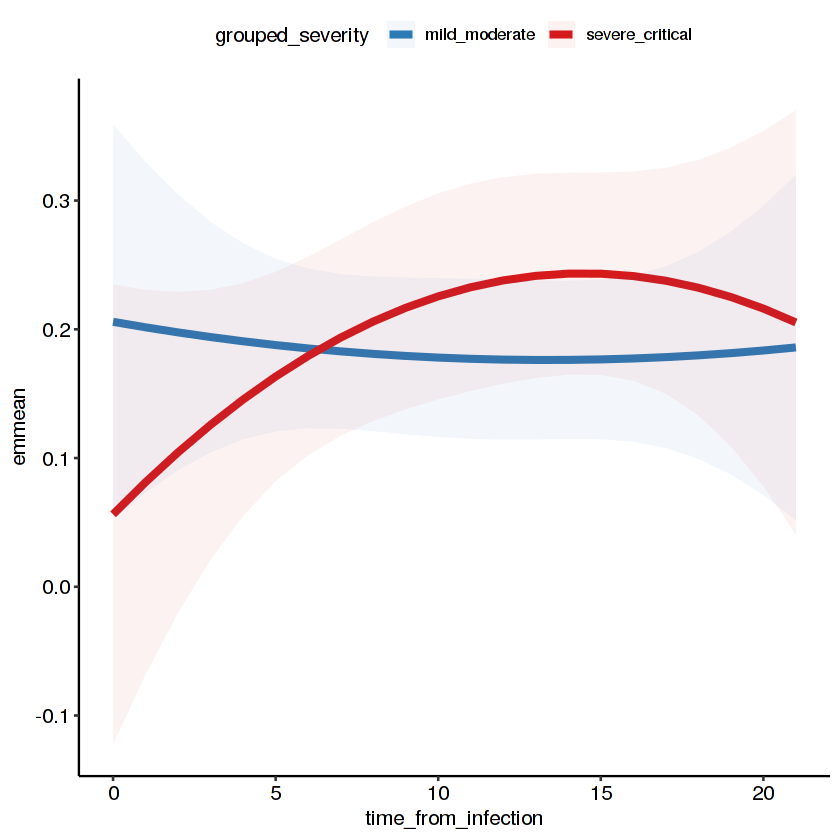

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”


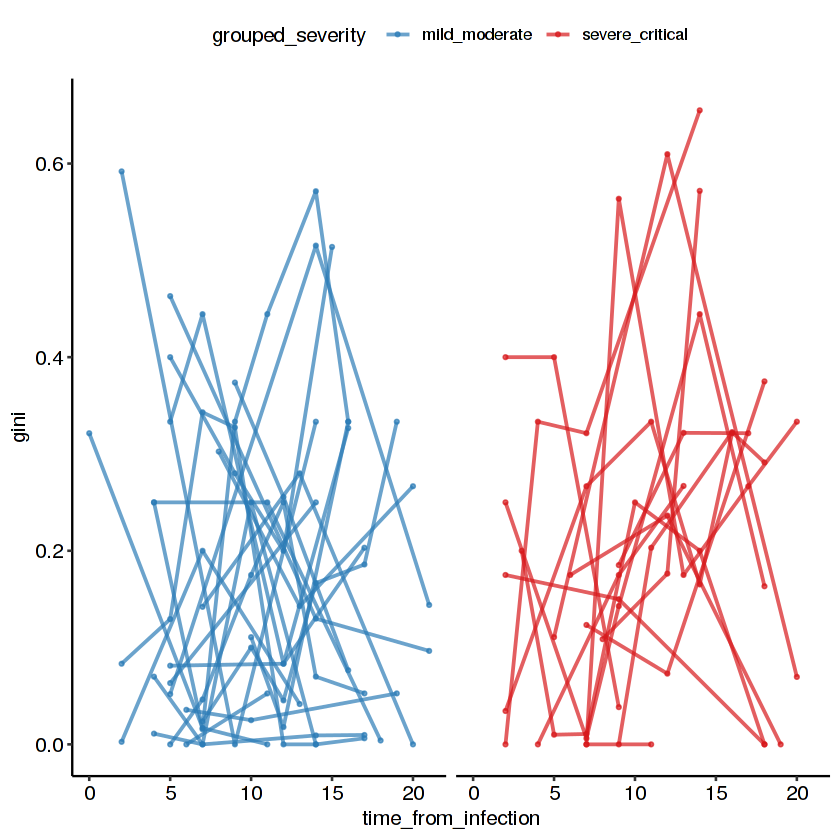

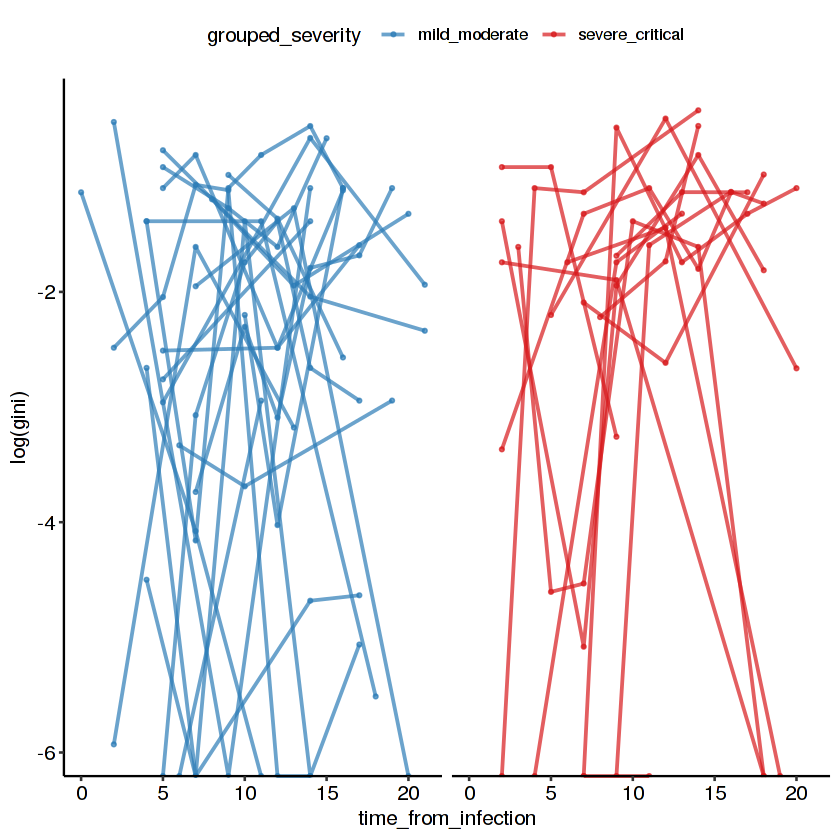

In [77]:
i = 1
x = emmeans(fits[[i]]$fit, ~ time_from_infection | grouped_severity, at = list(time_from_infection = 0:21))
theme_set(theme_pubr())

ggplot(data.frame(x), aes(time_from_infection, emmean, group = grouped_severity, fill = grouped_severity)) +
    geom_line(aes(colour = grouped_severity), size = 1.7) +
    geom_ribbon(aes(ymin = lower.CL, ymax = upper.CL), alpha = 0.055) +
    scale_color_manual(values = c("#2C7BB6", "#D7191C")) +
    scale_fill_manual(values = c("#2C7BB6", "#D7191C"))

ggplot(fits[[i]]$data, aes(time_from_infection, gini, col = grouped_severity)) +
    geom_point(alpha = 0.7, size = 0.7) +
    geom_line(aes(group = individual_id), alpha = 0.7, size = 0.8) +
    scale_color_manual(values = c("#2C7BB6", "#D7191C")) +
    facet_wrap(~grouped_severity) +
    theme(strip.background = element_blank(), strip.text.x = element_blank(), strip.text.y = element_blank())

ggplot(fits[[i]]$data, aes(time_from_infection, log(gini), col = grouped_severity)) +
    geom_point(alpha = 0.7, size = 0.7) +
    geom_line(aes(group = individual_id), alpha = 0.7, size = 0.8) +
    scale_color_manual(values = c("#2C7BB6", "#D7191C")) +
    facet_wrap(~grouped_severity) +
    theme(strip.background = element_blank(), strip.text.x = element_blank(), strip.text.y = element_blank())

Warning message in grid.Call.graphics(C_polygon, x$x, x$y, index):
“semi-transparency is not supported on this device: reported only once per page”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”


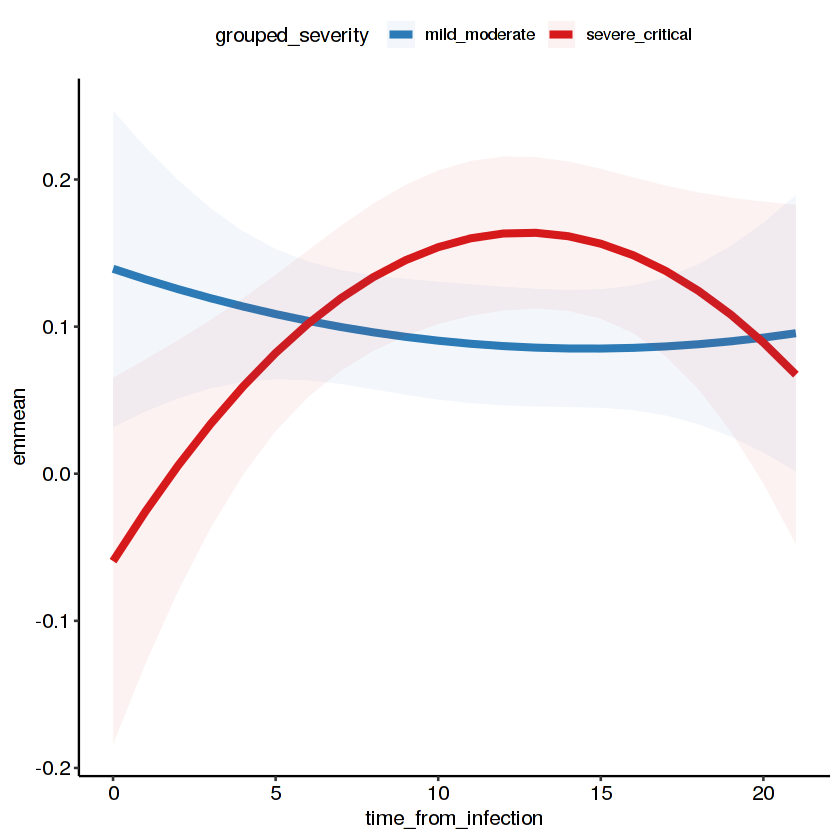

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”


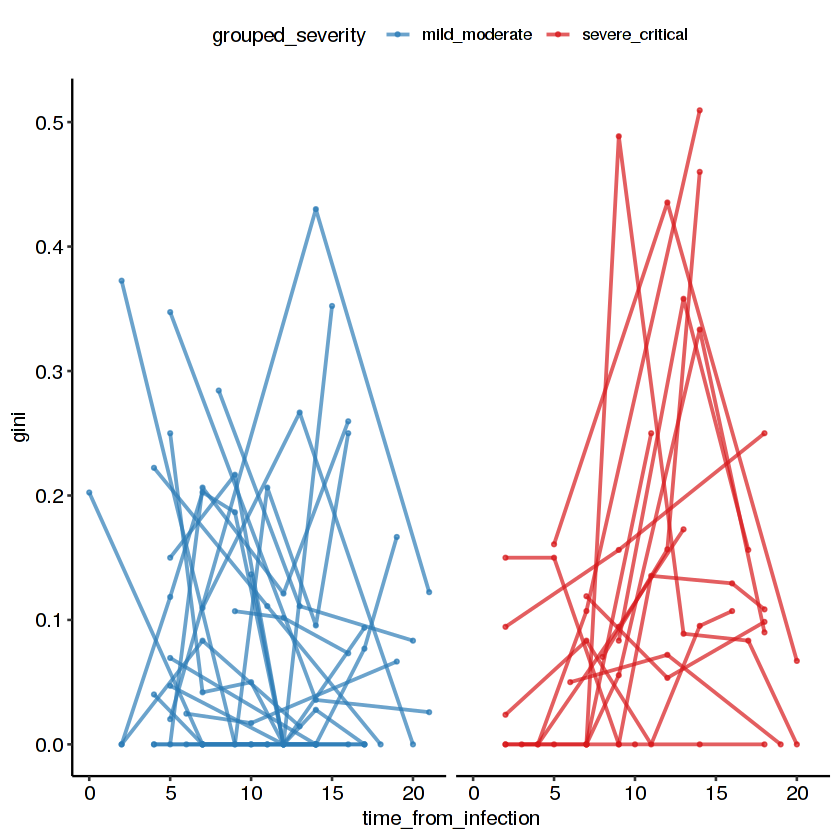

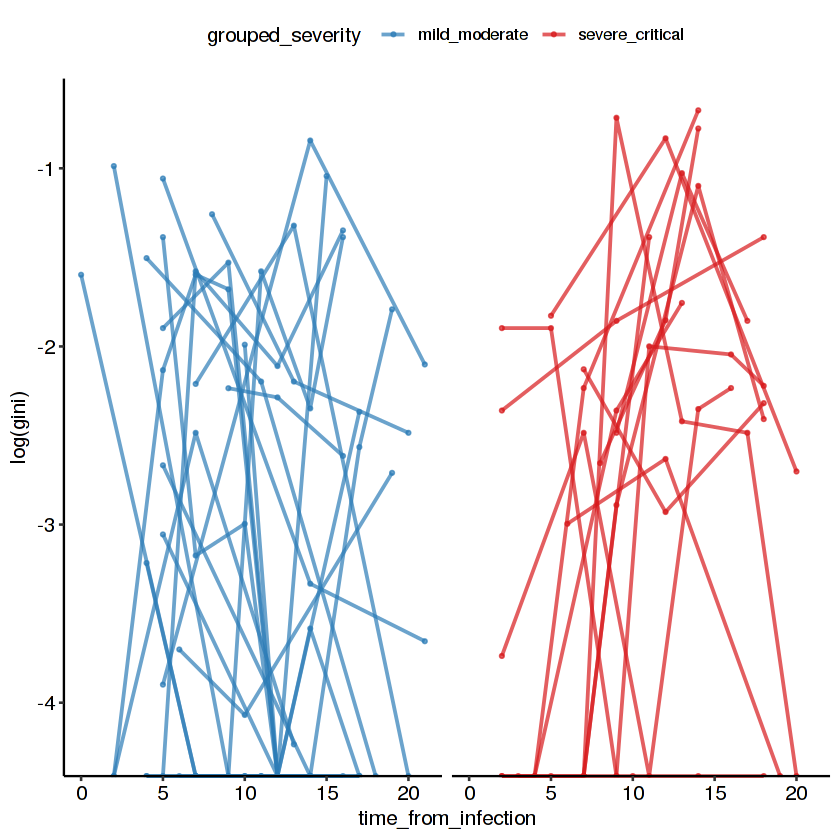

In [78]:
i = 2
x = emmeans(fits[[i]]$fit, ~ time_from_infection | grouped_severity, at = list(time_from_infection = 0:21))
theme_set(theme_pubr())

ggplot(data.frame(x), aes(time_from_infection, emmean, group = grouped_severity, fill = grouped_severity)) +
    geom_line(aes(colour = grouped_severity), size = 1.7) +
    geom_ribbon(aes(ymin = lower.CL, ymax = upper.CL), alpha = 0.055) +
    scale_color_manual(values = c("#2C7BB6", "#D7191C")) +
    scale_fill_manual(values = c("#2C7BB6", "#D7191C"))

ggplot(fits[[i]]$data, aes(time_from_infection, gini, col = grouped_severity)) +
    geom_point(alpha = 0.7, size = 0.7) +
    geom_line(aes(group = individual_id), alpha = 0.7, size = 0.8) +
    scale_color_manual(values = c("#2C7BB6", "#D7191C")) +
    facet_wrap(~grouped_severity) +
    theme(strip.background = element_blank(), strip.text.x = element_blank(), strip.text.y = element_blank())

ggplot(fits[[i]]$data, aes(time_from_infection, log(gini), col = grouped_severity)) +
    geom_point(alpha = 0.7, size = 0.7) +
    geom_line(aes(group = individual_id), alpha = 0.7, size = 0.8) +
    scale_color_manual(values = c("#2C7BB6", "#D7191C")) +
    facet_wrap(~grouped_severity) +
    theme(strip.background = element_blank(), strip.text.x = element_blank(), strip.text.y = element_blank())

In [79]:
## test 3

In [80]:
gini <- read.csv('h5ddl/network_gini_centrality.csv', row.names = 1)
dim(gini)

[1] 187   4

In [81]:
data = cbind(dfx, gini[row.names(dfx),])
dim(data)

[1] 187 231

In [82]:
# enforce at least 10 cells and remove non-positives
data <- data[data$case_control == 'POSITIVE', ]
data <- data[data$cell_counts >= 10, ]
dim(data)

[1] 136 231

In [83]:
fullFormula = as.formula("gini ~ splines::bs(time_from_infection, degree = 2) * grouped_severity + sex + ethnicity + age_scaled + centre + (1|individual_id)")
fullFormula

gini ~ splines::bs(time_from_infection, degree = 2) * grouped_severity + 
    sex + ethnicity + age_scaled + centre + (1 | individual_id)

In [84]:
fits <- lapply(c('clone_size_gini','clone_centrality_gini'), function(x){
    data$gini <- data[,x]
    fit <- lmerTest::lmer(fullFormula, data = data)
    return(list(fit=fit, data=data))
})

In [85]:
fit_res <- lapply(fits, function(x) anova(x$fit))
singular <- lapply(fits, function(x) as.numeric(isSingular(x$fit)))
conv <- lapply(fits, function(x) length(slot(x$fit, "optinfo")$conv$lme4$messages))
pvals <- lapply(fit_res, function(x) x[7,6])
qvals <- p.adjust(pvals, method = 'BH')
df = data.frame(pvals = unlist(pvals), 
                qvals = unlist(qvals), 
                singular = unlist(singular), 
                conv = unlist(conv), 
                row.names = c('cluster_size_gini', 'vertex_size_gini'))
# df = df[df$qval < 0.05 & df$singular == 0 & df$conv == 0,]
df

,pvals,qvals,singular,conv
,<dbl>,<dbl>,<dbl>,<int>
cluster_size_gini,0.09088791,0.09088791,0,0
vertex_size_gini,0.05642546,0.09088791,0,0


Warning message in grid.Call.graphics(C_polygon, x$x, x$y, index):
“semi-transparency is not supported on this device: reported only once per page”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”


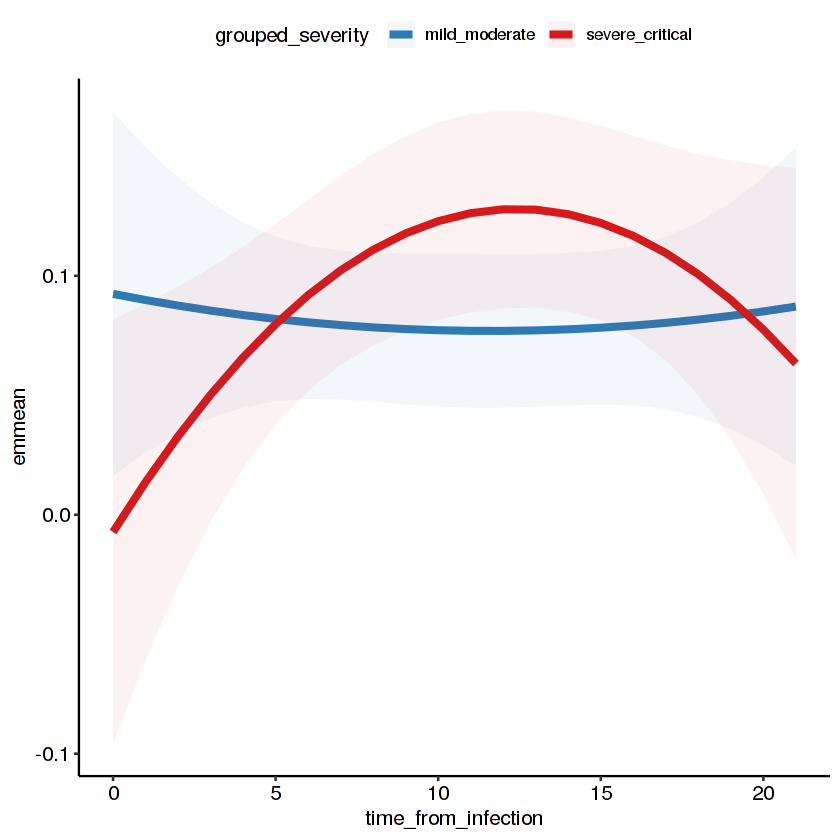

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”


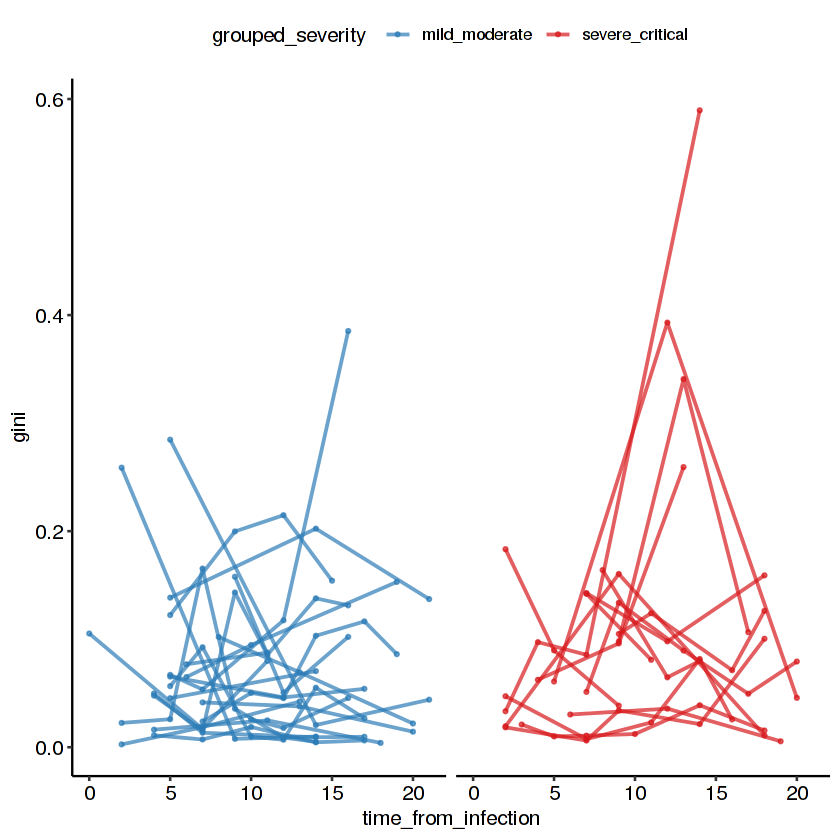

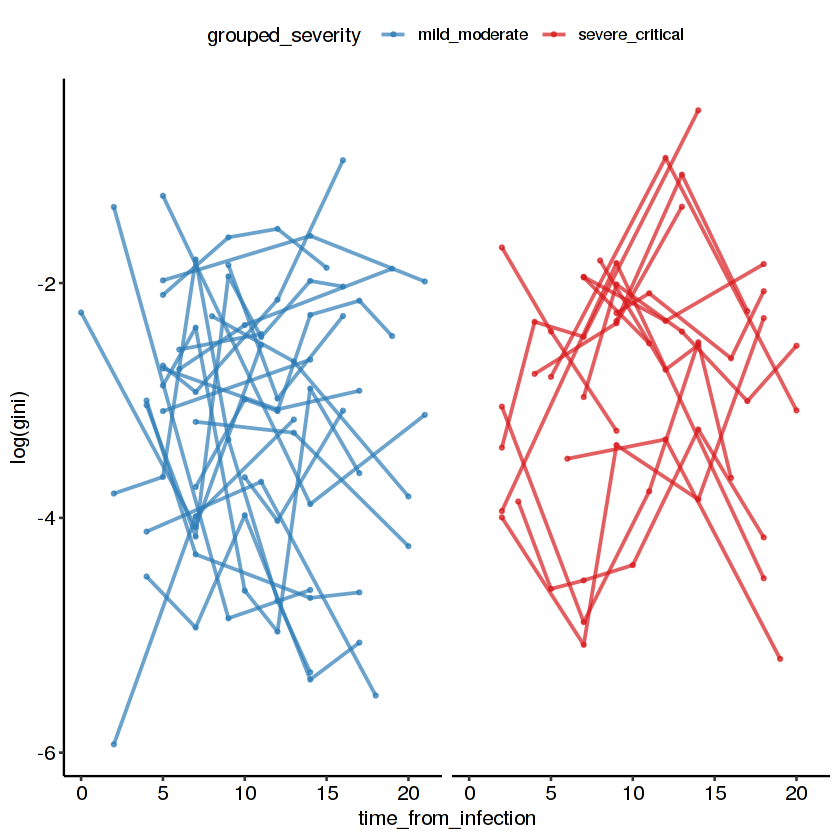

In [86]:
i = 1
x = emmeans(fits[[i]]$fit, ~ time_from_infection | grouped_severity, at = list(time_from_infection = 0:21))
theme_set(theme_pubr())

ggplot(data.frame(x), aes(time_from_infection, emmean, group = grouped_severity, fill = grouped_severity)) +
    geom_line(aes(colour = grouped_severity), size = 1.7) +
    geom_ribbon(aes(ymin = lower.CL, ymax = upper.CL), alpha = 0.055) +
    scale_color_manual(values = c("#2C7BB6", "#D7191C")) +
    scale_fill_manual(values = c("#2C7BB6", "#D7191C"))

ggplot(fits[[i]]$data, aes(time_from_infection, gini, col = grouped_severity)) +
    geom_point(alpha = 0.7, size = 0.7) +
    geom_line(aes(group = individual_id), alpha = 0.7, size = 0.8) +
    scale_color_manual(values = c("#2C7BB6", "#D7191C")) +
    facet_wrap(~grouped_severity) +
    theme(strip.background = element_blank(), strip.text.x = element_blank(), strip.text.y = element_blank())

ggplot(fits[[i]]$data, aes(time_from_infection, log(gini), col = grouped_severity)) +
    geom_point(alpha = 0.7, size = 0.7) +
    geom_line(aes(group = individual_id), alpha = 0.7, size = 0.8) +
    scale_color_manual(values = c("#2C7BB6", "#D7191C")) +
    facet_wrap(~grouped_severity) +
    theme(strip.background = element_blank(), strip.text.x = element_blank(), strip.text.y = element_blank())

Warning message in grid.Call.graphics(C_polygon, x$x, x$y, index):
“semi-transparency is not supported on this device: reported only once per page”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”


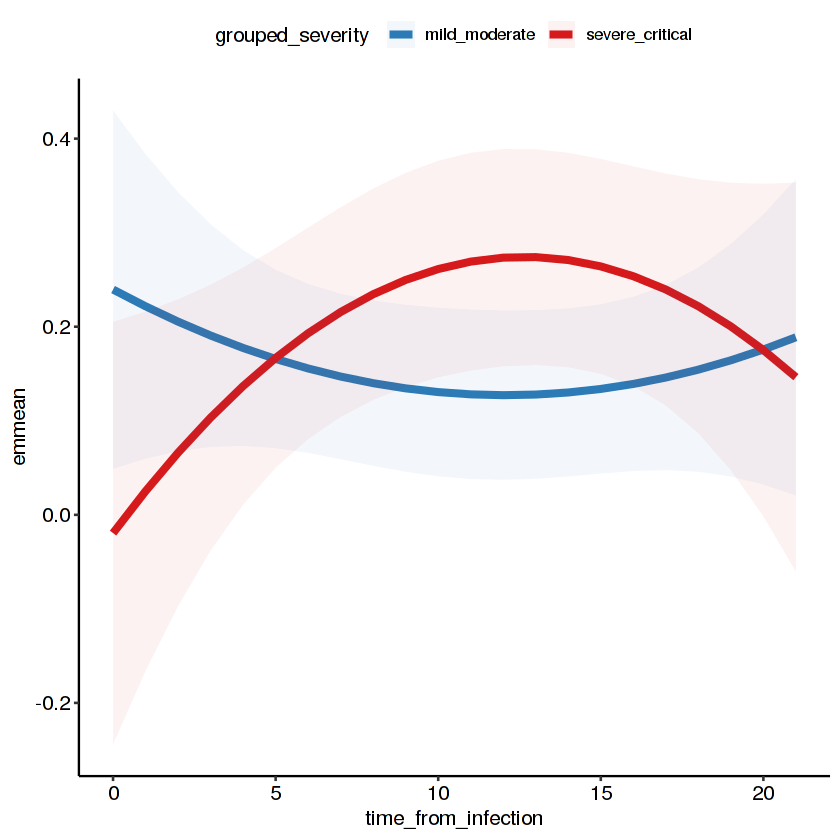

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”


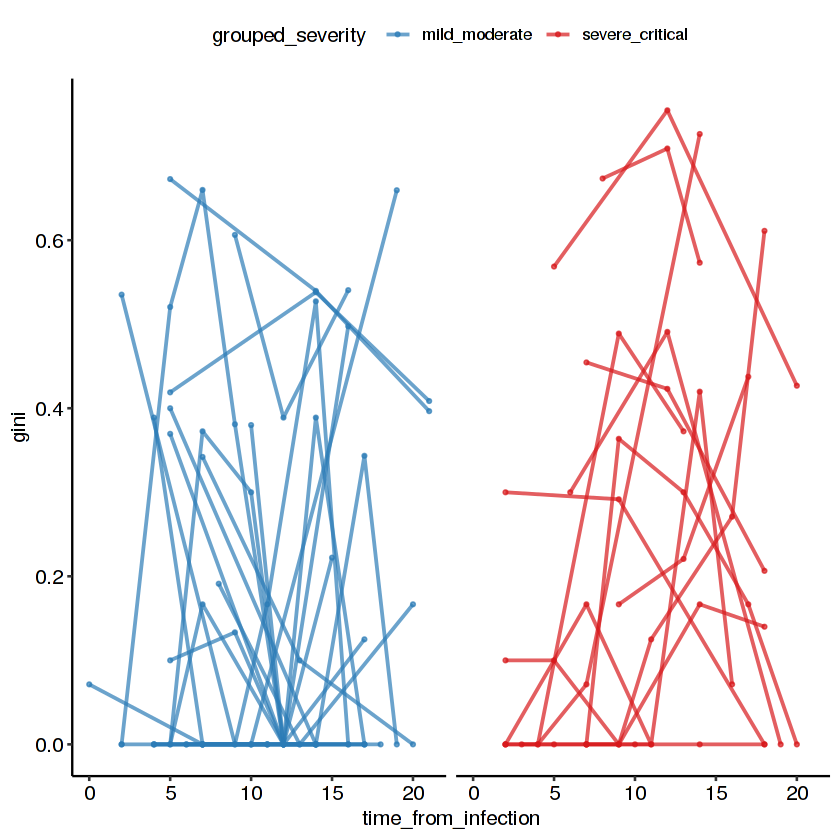

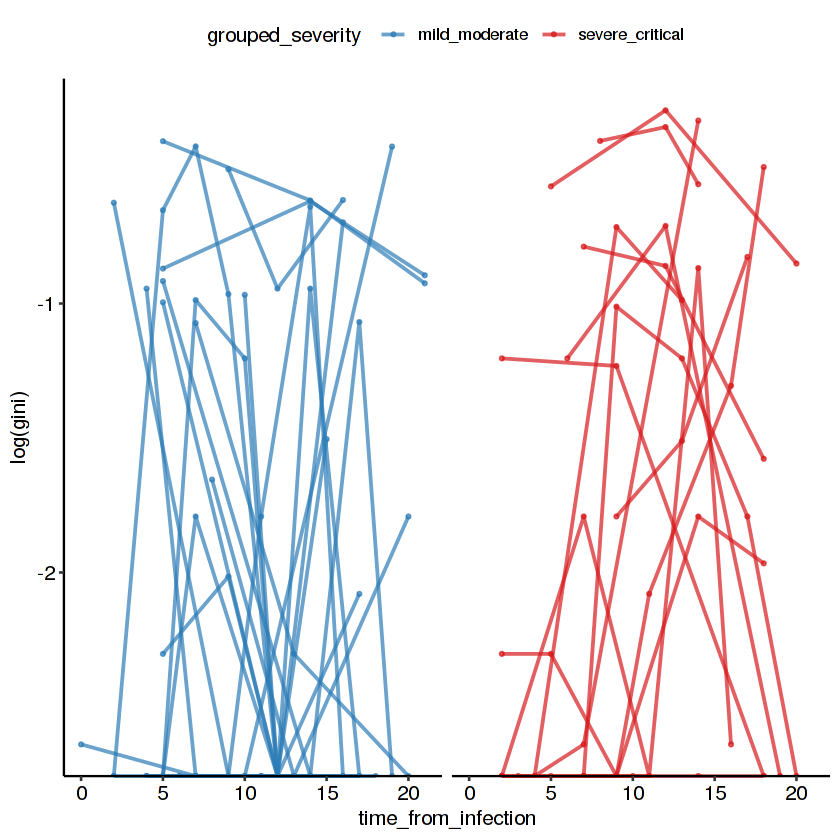

In [88]:
i = 2
x = emmeans(fits[[i]]$fit, ~ time_from_infection | grouped_severity, at = list(time_from_infection = 0:21))
theme_set(theme_pubr())

ggplot(data.frame(x), aes(time_from_infection, emmean, group = grouped_severity, fill = grouped_severity)) +
    geom_line(aes(colour = grouped_severity), size = 1.7) +
    geom_ribbon(aes(ymin = lower.CL, ymax = upper.CL), alpha = 0.055) +
    scale_color_manual(values = c("#2C7BB6", "#D7191C")) +
    scale_fill_manual(values = c("#2C7BB6", "#D7191C"))

ggplot(fits[[i]]$data, aes(time_from_infection, gini, col = grouped_severity)) +
    geom_point(alpha = 0.7, size = 0.7) +
    geom_line(aes(group = individual_id), alpha = 0.7, size = 0.8) +
    scale_color_manual(values = c("#2C7BB6", "#D7191C")) +
    facet_wrap(~grouped_severity) +
    theme(strip.background = element_blank(), strip.text.x = element_blank(), strip.text.y = element_blank())

ggplot(fits[[i]]$data, aes(time_from_infection, log(gini), col = grouped_severity)) +
    geom_point(alpha = 0.7, size = 0.7) +
    geom_line(aes(group = individual_id), alpha = 0.7, size = 0.8) +
    scale_color_manual(values = c("#2C7BB6", "#D7191C")) +
    facet_wrap(~grouped_severity) +
    theme(strip.background = element_blank(), strip.text.x = element_blank(), strip.text.y = element_blank())